In [3]:
!pip install pandas numpy scikit-learn tensorflow
!pip install openpyxl



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [88]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

In [89]:
data = pd.read_csv("train_final.csv")
for col in data.columns:
    print(col)

Unnamed: 0.2
Unnamed: 0
Unnamed: 0.1
Unnamed: 0.1.1
Unnamed: 0.1.1.1
Unnamed: 0.1.1.1.1
ID
label
statement
subject
speaker
speaker_job
state_info
party_affiliation
barely_true_counts
false_counts
half_true_counts
mostly_true_counts
pants_on_fire_counts
context
sentiment
sentiment_score
sentiment_magnitude
anger
fear
joy
disgust
sad
speaker_id
list
sentiment_code


In [90]:
data.head()

,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,ID,label,statement,subject,...,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad,speaker_id,list,sentiment_code
0,0,0,0,0,0,0,2635.json,false,Says the Annies List political group supports ...,abortion,...,-0.5,0.5,0.121137,0.008926,0.026096,0.263479,0.531887,_0_,"[0, 1]",_NEG_
1,1,1,1,1,1,1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",...,-0.4,0.8,0.095352,0.124566,0.191357,0.016999,0.102045,_1_,"[0, 1]",_NEG_
2,2,2,2,2,2,2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,...,-0.3,0.3,0.039559,0.024162,0.500384,0.454228,0.052453,_2_,"[1, 0]",_NEG_
3,3,3,3,3,3,3,1123.json,false,Health care reform legislation is likely to ma...,health-care,...,-0.3,0.3,0.004804,0.194674,0.375055,0.022509,0.383403,_3_,"[0, 1]",_NEG_
4,4,4,4,4,4,4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",...,0.0,0.0,0.044237,0.215996,0.222402,0.045672,0.274343,_4_,"[0, 1]",NaN


In [91]:
data = data.drop(['Unnamed: 0.2','Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','Unnamed: 0.1.1.1','Unnamed: 0.1.1.1.1'],axis=1)

In [92]:
data.head()
# data.reset_index()

,ID,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,barely_true_counts,false_counts,...,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad,speaker_id,list,sentiment_code
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,...,-0.5,0.5,0.121137,0.008926,0.026096,0.263479,0.531887,_0_,"[0, 1]",_NEG_
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,...,-0.4,0.8,0.095352,0.124566,0.191357,0.016999,0.102045,_1_,"[0, 1]",_NEG_
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,...,-0.3,0.3,0.039559,0.024162,0.500384,0.454228,0.052453,_2_,"[1, 0]",_NEG_
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,...,-0.3,0.3,0.004804,0.194674,0.375055,0.022509,0.383403,_3_,"[0, 1]",_NEG_
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,...,0.0,0.0,0.044237,0.215996,0.222402,0.045672,0.274343,_4_,"[0, 1]",NaN


## Pre Processing:

##### 1. Text Lowercasing:

In [93]:
!pip install nltk


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [96]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string

# 1. Text Lowercasing
data['statement'] = data['statement'].str.lower()

# 2. Removing Punctuation
data['statement'] = data['statement'].str.replace('[{}]'.format(string.punctuation), '')

# # 3. Stopword Removal
# stop_words = set(stopwords.words('english'))
# data['statement'] = data['statement'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

# # 4. Handling Numbers and Special Characters (Optional)
# data['statement'] = data['statement'].apply(lambda x: [word for word in x if not word.isdigit()])

# # 5. Handling URLs and Mentions (Optional)
# data['statement'] = data['statement'].apply(lambda x: [word for word in x if not word.startswith(('http://', 'https://', '@'))])

# Print the preprocessed data
print(data['statement'])


0        says the annies list political group supports ...
1        when did the decline of coal start it started ...
2        hillary clinton agrees with john mccain by vot...
3        health care reform legislation is likely to ma...
4        the economic turnaround started at the end of ...
                               ...                        
10231    there are a larger number of shark attacks in ...
10232    democrats have now become the party of the atl...
10233    says an alternative to social security that op...
10234    on lifting the us cuban embargo and allowing t...
10235    the department of veterans affairs has a manua...
Name: statement, Length: 10236, dtype: object


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vaibh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\vaibh\AppData\Local\Temp\ipykernel_2260\2096745980.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  data['statement'] = data['statement'].str.replace('[{}]'.format(string.punctuation), '')


In [97]:
data

,ID,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,barely_true_counts,false_counts,...,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad,speaker_id,list,sentiment_code
0,2635.json,false,says the annies list political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,...,-0.5,0.5,0.121137,0.008926,0.026096,0.263479,0.531887,_0_,"[0, 1]",_NEG_
1,10540.json,half-true,when did the decline of coal start it started ...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,...,-0.4,0.8,0.095352,0.124566,0.191357,0.016999,0.102045,_1_,"[0, 1]",_NEG_
2,324.json,mostly-true,hillary clinton agrees with john mccain by vot...,foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,...,-0.3,0.3,0.039559,0.024162,0.500384,0.454228,0.052453,_2_,"[1, 0]",_NEG_
3,1123.json,false,health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,...,-0.3,0.3,0.004804,0.194674,0.375055,0.022509,0.383403,_3_,"[0, 1]",_NEG_
4,9028.json,half-true,the economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,...,0.0,0.0,0.044237,0.215996,0.222402,0.045672,0.274343,_4_,"[0, 1]",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10231,5473.json,mostly-true,there are a larger number of shark attacks in ...,"animals,elections",aclu-florida,NaN,Florida,none,0.0,1.0,...,-0.6,0.6,0.354176,0.290966,0.020772,0.176219,0.216899,_1054_,"[1, 0]",_NEG_
10232,3408.json,mostly-true,democrats have now become the party of the atl...,elections,alan-powell,NaN,Georgia,republican,0.0,0.0,...,0.0,0.0,0.189920,0.077568,0.050404,0.196092,0.410885,_2910_,"[1, 0]",NaN
10233,3959.json,half-true,says an alternative to social security that op...,"retirement,social-security",herman-cain,NaN,Georgia,republican,4.0,11.0,...,-0.4,0.4,0.119778,0.206043,0.152902,0.095003,0.220693,_540_,"[0, 1]",_NEG_
10234,2253.json,false,on lifting the us cuban embargo and allowing t...,"florida,foreign-policy",jeff-greene,NaN,Florida,democrat,3.0,1.0,...,0.0,0.0,0.113820,0.066778,0.312947,0.242768,0.084354,_376_,"[0, 1]",NaN


In [98]:
texts = data['statement'].astype(str)
labels = data['sentiment']

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

data.head()


,ID,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,barely_true_counts,false_counts,...,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad,speaker_id,list,sentiment_code
0,2635.json,false,says the annies list political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,...,-0.5,0.5,0.121137,0.008926,0.026096,0.263479,0.531887,_0_,"[0, 1]",_NEG_
1,10540.json,half-true,when did the decline of coal start it started ...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,...,-0.4,0.8,0.095352,0.124566,0.191357,0.016999,0.102045,_1_,"[0, 1]",_NEG_
2,324.json,mostly-true,hillary clinton agrees with john mccain by vot...,foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,...,-0.3,0.3,0.039559,0.024162,0.500384,0.454228,0.052453,_2_,"[1, 0]",_NEG_
3,1123.json,false,health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,...,-0.3,0.3,0.004804,0.194674,0.375055,0.022509,0.383403,_3_,"[0, 1]",_NEG_
4,9028.json,half-true,the economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,...,0.0,0.0,0.044237,0.215996,0.222402,0.045672,0.274343,_4_,"[0, 1]",NaN


In [103]:
# Test model 1:


# train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)

# tokenizer = Tokenizer(num_words=10000)
# tokenizer.fit_on_texts(train_texts)

# train_sequences = tokenizer.texts_to_sequences(train_texts)
# test_sequences = tokenizer.texts_to_sequences(test_texts)

# max_sequence_length = max(len(seq) for seq in train_sequences)
# train_data = pad_sequences(train_sequences, maxlen=max_sequence_length)
# test_data = pad_sequences(test_sequences, maxlen=max_sequence_length)

# model = Sequential()
# model.add(Embedding(10000, 128, input_length=max_sequence_length))
# model.add(Conv1D(128, 5, activation='relu'))
# model.add(GlobalMaxPooling1D())
# model.add(Dense(1, activation='sigmoid'))

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# model.fit(train_data, train_labels, epochs=10, batch_size=16, validation_data=(test_data, test_labels))

# _, accuracy = model.evaluate(test_data, test_labels)
# print('Accuracy:', accuracy)


In [101]:
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_texts)

train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

max_sequence_length = max(len(seq) for seq in train_sequences)
train_data = pad_sequences(train_sequences, maxlen=max_sequence_length)
test_data = pad_sequences(test_sequences, maxlen=max_sequence_length)

model = Sequential()
model.add(Embedding(10000, 128, input_length=max_sequence_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs=10, batch_size=16, validation_data=(test_data, test_labels))

_, accuracy = model.evaluate(test_data, test_labels)
print('Accuracy:', accuracy)


Epoch 1/10
512/512 [==============================] - 37s 71ms/step - loss: 0.5675 - accuracy: 0.6783 - val_loss: 0.4821 - val_accuracy: 0.5591
Epoch 2/10
512/512 [==============================] - 37s 72ms/step - loss: 0.1284 - accuracy: 0.6831 - val_loss: 0.5748 - val_accuracy: 0.6113
Epoch 3/10
512/512 [==============================] - 36s 71ms/step - loss: -2.2101 - accuracy: 0.7113 - val_loss: 4.7443 - val_accuracy: 0.5674
Epoch 4/10
512/512 [==============================] - 38s 74ms/step - loss: -18.2324 - accuracy: 0.7107 - val_loss: 23.9090 - val_accuracy: 0.6230
Epoch 5/10
512/512 [==============================] - 37s 72ms/step - loss: -77.6965 - accuracy: 0.7224 - val_loss: 74.2525 - val_accuracy: 0.5659
Epoch 6/10
512/512 [==============================] - 37s 73ms/step - loss: -220.1661 - accuracy: 0.7269 - val_loss: 170.8698 - val_accuracy: 0.5645
Epoch 7/10
512/512 [==============================] - 37s 73ms/step - loss: -482.1873 - accuracy: 0.7280 - val_loss: 330.971

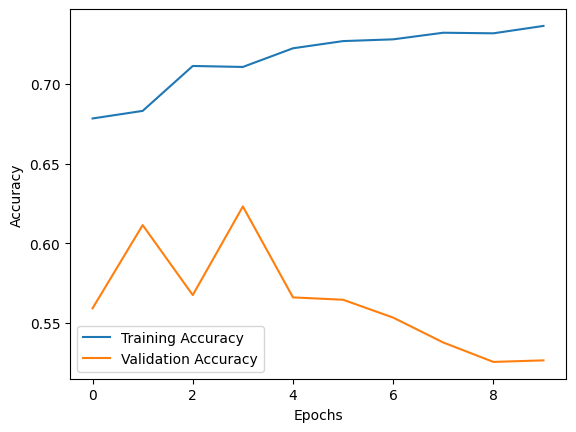

64/64 [==============================] - 2s 30ms/step


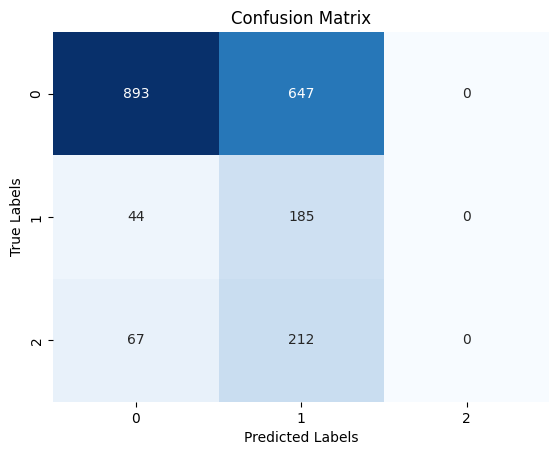

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Train the model
# history = model.fit(train_data, train_labels, epochs=10, batch_size=16, validation_data=(test_data, test_labels))

# # Plot training and validation loss
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Predict on test data
predictions = model.predict(test_data)
predicted_labels = [1 if pred >= 0.5 else 0 for pred in predictions]

# Create confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
